In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [5]:
car_data = pd.read_csv('/content/car data.csv')

In [6]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
car_data.Owner.value_counts()

,count
Owner,
0,290
1,10
3,1


In [8]:
car_data.shape

(301, 9)

In [9]:
car_data.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [10]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [11]:
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [12]:
#cheking the destribution of the categorical data
car_data.Fuel_Type.value_counts()

,count
Fuel_Type,
Petrol,239
Diesel,60
CNG,2


In [13]:
car_data.Seller_Type.value_counts()

,count
Seller_Type,
Dealer,195
Individual,106


In [14]:
car_data.Transmission.value_counts()

,count
Transmission,
Manual,261
Automatic,40


In [15]:
car_data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)
car_data.replace( {'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
car_data.replace( {'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

In [16]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [17]:
x = car_data.drop(columns=['Car_Name','Selling_Price'],axis=1)
y= car_data.Selling_Price

In [18]:
x

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [19]:
y


,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60
...,...
296,9.50
297,4.00
298,3.35
299,11.50


In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=2)

In [23]:
model1 = LinearRegression()

In [24]:
model1.fit(x_train,y_train)

LinearRegression()

In [29]:
y_train_prediction = model1.predict(x_train)
MSE = metrics.r2_score(y_train,y_train_prediction)

In [30]:
print(MSE)

0.8799451660493711


In [31]:
y_test_prediction = model1.predict(x_test)
MSE = metrics.r2_score(y_test,y_test_prediction)
print(MSE)

0.8365766715027051


#visualize the actual prices and the predicted prices

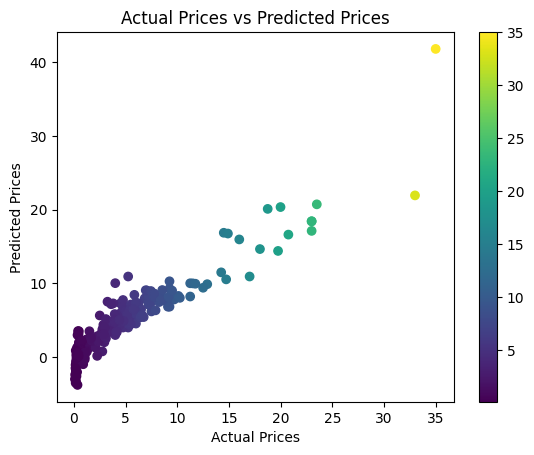

In [33]:
import matplotlib.pyplot as plt

# Example: Using a colormap for different colors
plt.scatter(y_train, y_train_prediction, c=y_train, cmap='viridis')  # You can change 'viridis' to any other colormap
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.colorbar()  # Adds a colorbar to the plot
plt.show()


In [34]:
model2 = Lasso()

In [35]:
model2.fit(x_train,y_train)

Lasso()

In [36]:
y_train_prediction = model2.predict(x_train)
MSE = metrics.r2_score(y_train,y_train_prediction)

In [37]:
print(MSE)

0.8427856123435794


In [38]:
y_test_prediction = model2.predict(x_test)
MSE = metrics.r2_score(y_test,y_test_prediction)
print(MSE)

0.8709167941173195


#visualize the actual prices and the predicted prices

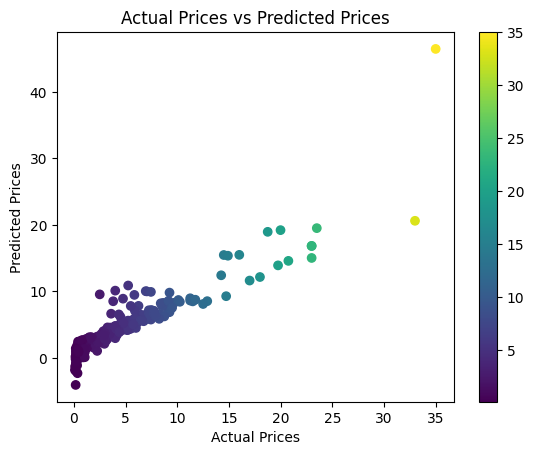

In [39]:
import matplotlib.pyplot as plt

# Example: Using a colormap for different colors
plt.scatter(y_train, y_train_prediction, c=y_train, cmap='viridis')  # You can change 'viridis' to any other colormap
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.colorbar()  # Adds a colorbar to the plot
plt.show()


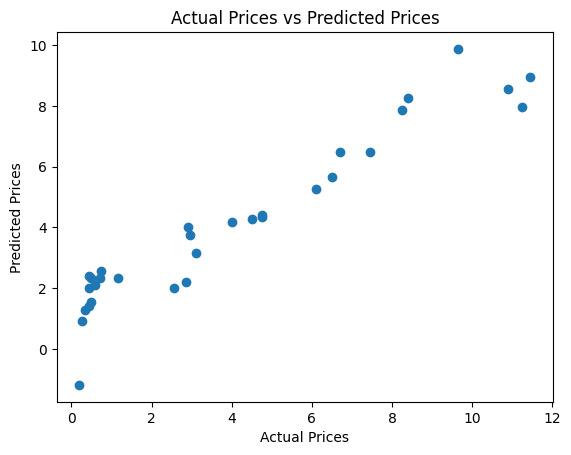

In [42]:
# Example: Using a colormap for different colors
plt.scatter(y_test, y_test_prediction,)  # You can change 'viridis' to any other colormap
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')

plt.show()
